# Named Entity Recognition(NER)
- **Entity Classification**: NER identifies and categorizes entities like names, locations, and dates in text, helping to extract key information.
- **Broad Application**: It enhances tasks like information extraction , question answering, and summarization by highlighting important entities in the text.

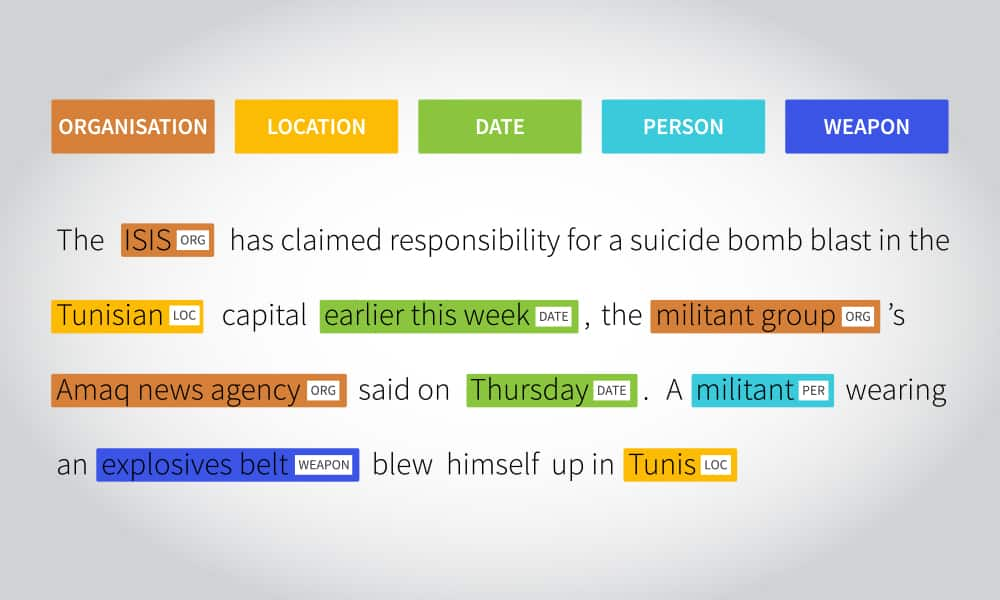

In [1]:
import spacy
from prettytable import PrettyTable

nlp = spacy.load('en_core_web_sm')

In [ ]:
nlp.get_pipe('ner').labels # pre-trained model --> ner

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [7]:
text = """
On December 20, 2025, Satya Nadella announced that Microsoft would invest $5 billion to build a new research hub in London. This facility, located near Kings Cross, aims to rival the innovation seen at Google in Mountain View, California.
"""

In [8]:
from spacy import displacy
doc = nlp(text = text)
displacy.render(doc, style = 'ent', jupyter = True)

In [10]:
table = PrettyTable()
table.field_names=['token', 'label', 'explanation', 'Star Char', 'End Char']
for ent in doc.ents:
        table.add_row([ent.text, ent.label_, spacy.explain(ent.label_), ent.start_char, ent.end_char])

print(table)

+-------------------+--------+-----------------------------------------+-----------+----------+
|       token       | label  |               explanation               | Star Char | End Char |
+-------------------+--------+-----------------------------------------+-----------+----------+
| December 20, 2025 |  DATE  |  Absolute or relative dates or periods  |     4     |    21    |
|   Satya Nadella   | PERSON |       People, including fictional       |     23    |    36    |
|     Microsoft     |  ORG   | Companies, agencies, institutions, etc. |     52    |    61    |
|     $5 billion    | MONEY  |     Monetary values, including unit     |     75    |    85    |
|       London      |  GPE   |        Countries, cities, states        |    117    |   123    |
|    Kings Cross    |  ORG   | Companies, agencies, institutions, etc. |    153    |   164    |
|       Google      |  ORG   | Companies, agencies, institutions, etc. |    203    |   209    |
|   Mountain View   |  GPE   |        Co